We load some packages

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import draw
from sklearn.decomposition import NMF
from keras.datasets import mnist
plt.rcParams['image.cmap']='winter'
plt.rcParams["figure.figsize"] = (10,10)

dim = 100

Some helper function to create circles and ellipses

In [85]:
def get_circle_image():
    img = np.zeros((dim, dim))
    rr, cc = draw.circle_perimeter(25, 25, radius=16, shape=img.shape)
    img[rr, cc] = 1
    return img
def get_ellipse_image():
    img = np.zeros((dim, dim))
    rr, cc = draw.ellipse_perimeter(75, 75, r_radius=20, c_radius=16, shape=img.shape)
    img[rr, cc] = 1
    return img


This is what our images look like

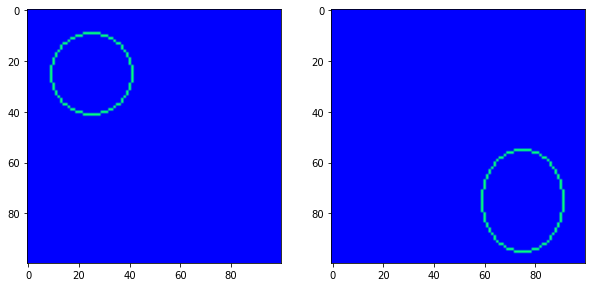

In [86]:
circle = get_circle_image()
square = get_ellipse_image()
fig, ax = plt.subplots(1,2)
ax[0].imshow(circle)
ax[1].imshow(square)
plt.show()

Creating a dataset of these images

In [87]:
def get_image_dataset(n1, n2):
    circles = np.concatenate([get_circle_image().reshape((1, dim**2)) for i in range(n1)], axis=0)
    elipses =  np.concatenate([get_ellipse_image().reshape((1, dim**2)) for i in range(n2)], axis=0)

    return np.concatenate([circles, elipses], axis=0)

img_data = get_image_dataset(20,30)

Fitting MNF

In [88]:
model = NMF(n_components=2, init='random', random_state=0)
W = model.fit_transform(img_data)
H = model.components_

The lower dimensional representation of the data

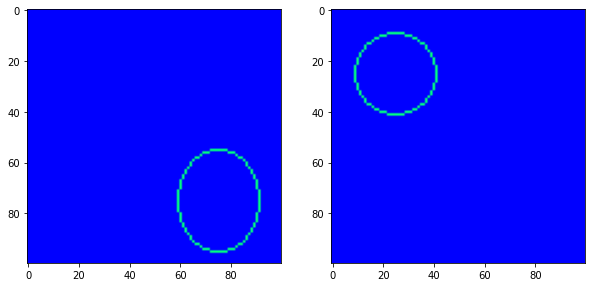

In [89]:
def plot_components(H):
    fig, axs = plt.subplots(1, H.shape[0])
    pixels = int(np.sqrt(H.shape[1]))
    for i in range(H.shape[0]):
        axs[i].imshow(H[i, ...].reshape((pixels, pixels)))

    plt.show()

plot_components(H)

The clusters

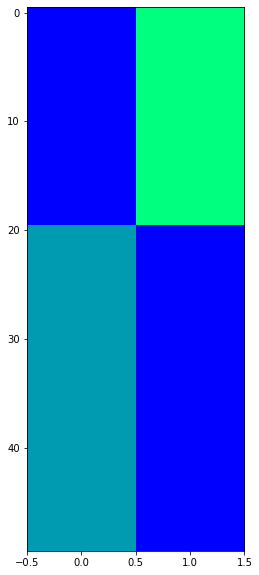

In [90]:
plt.imshow(W, aspect=0.1)
plt.show()

Let's play with a data that is a bit more messy

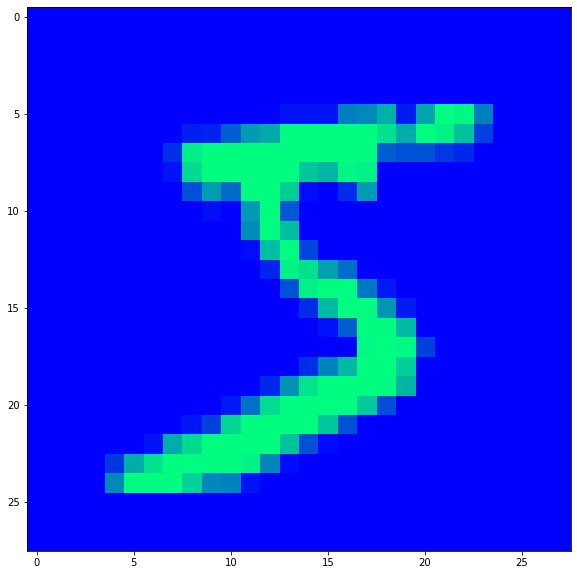

In [91]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
plt.imshow(train_X[0,...])
plt.show()

In [92]:
samples = 10000
mnist_data = train_X[0:samples,...].reshape(samples, 28**2)

In [101]:
model_mnist = NMF(n_components=20, init='random', random_state=42)
W = model_mnist.fit_transform(mnist_data)
H = model_mnist.components_

/Users/omerronen/anaconda3/envs/215a/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


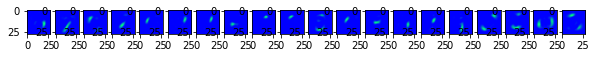

In [102]:
plot_components(H)

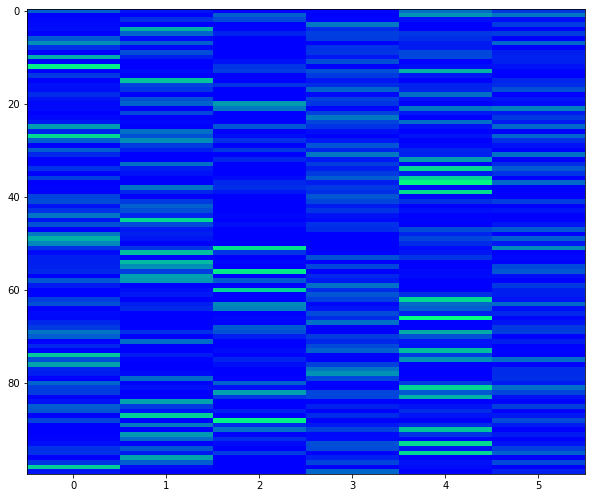

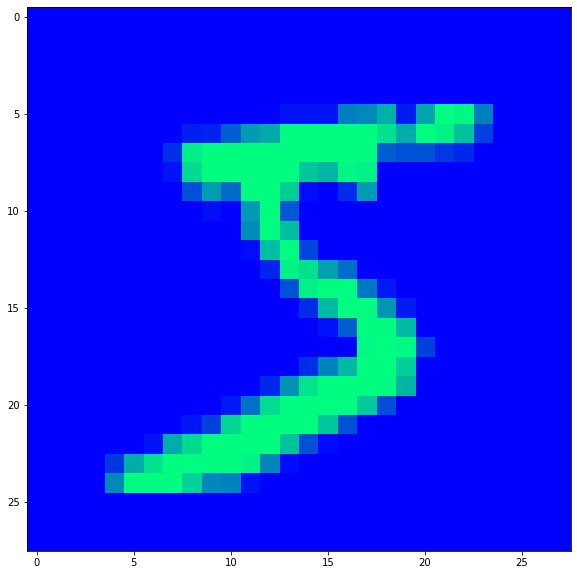

In [100]:
plt.imshow(W[0:100,...], aspect=0.05)
plt.show()
plt.imshow(train_X[0,...].reshape((28,28)))
plt.show()